# E- Commerce Churn Prediction

### Problem Statement
 - Customer churn has become a big issue because it costs a lot more to acquire a new customer than retaining existing ones.<br> With the use of a customer churn prediction model,  possible churners who are at high risk  can be identified, and as a result<br> Companies can take some action to prevent them from leaving.

#### Aim
- To identify factors which are responsible for customer churn.
- Prepare a model which can predict customers who are at high risk and whether a customer is going to churn or not.

#### Model we will use on this project 
- Logistics Regression because churn has only two class, 0 and 1.
- Tree based method like  Decision Tree, Bagging and Boosting.

Important points to focus
- focus on to reduce false negative i.e increase True positive, as it is important to correctly predict possible churner.
- will use Roc curve to determine the optimal threshold

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx',sheet_name = 1)
pd.set_option('display.max_columns', None)

- order amount hike from last year (% increase)

In [3]:
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


&nbsp;

# Data Exploration
***

In [4]:
df.shape 

(5630, 20)

In [5]:
for i in df.columns:
    print(i)

CustomerID
Churn
Tenure
PreferredLoginDevice
CityTier
WarehouseToHome
PreferredPaymentMode
Gender
HourSpendOnApp
NumberOfDeviceRegistered
PreferedOrderCat
SatisfactionScore
MaritalStatus
NumberOfAddress
Complain
OrderAmountHikeFromlastYear
CouponUsed
OrderCount
DaySinceLastOrder
CashbackAmount


### Assumption 
- __Tenure is in month.__
- __Ware House to Home is in km.__

In [6]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:

for i in df.columns:
    if df[i].dtype == "object":
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode

the values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

the values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

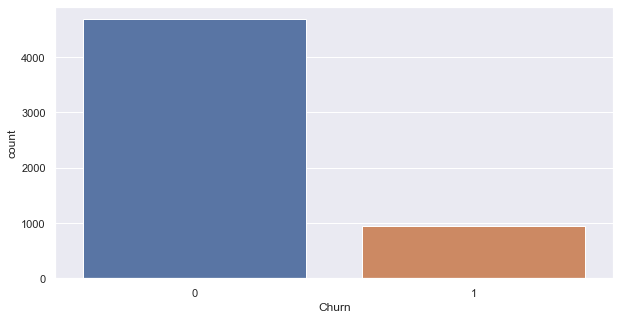

In [9]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot('Churn', data = df)

## Similar Category in columns
********
- __In prefered login device, Mobile phone and phone are same.__
- __In preferd Payment mode, cc and credit card , cod and cash on delivery are same.__
- __In prefered order category, mobile phone and mobile are same.__



## Missing values (almost 4-5 % missing values in each of the below columns)
*******
- Tenure  __dtype - float__
- Warehouse to home  __dtype - float__
- Hour Spend On App   __dtype - float__
- Order Amount Hike From Last Year   __dtype - float__
- Coupon Used   __dtype - float__
- Order Count   __dtype - float__
- Day Since Last order    __dtype - float__


&nbsp;

&nbsp;

## Treating similar category 

In [10]:
df["PreferredLoginDevice"] = df.PreferredLoginDevice.replace(to_replace = "Phone", value = "Mobile Phone")

In [11]:
df["PreferredPaymentMode"] = df.PreferredPaymentMode.replace(to_replace = ["Cash on Delivery","CC"], value = ["COD", "Credit Card"])

In [12]:
df["PreferedOrderCat"] = df.PreferedOrderCat.replace(to_replace = "Mobile", value = "Mobile Phone")

In [13]:
for i in df.columns:
    if df[i].dtype == "object":
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode

the values are:
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: PreferredPaymentMode, dtype: int64


Gender

the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

the values are:
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




<AxesSubplot:>

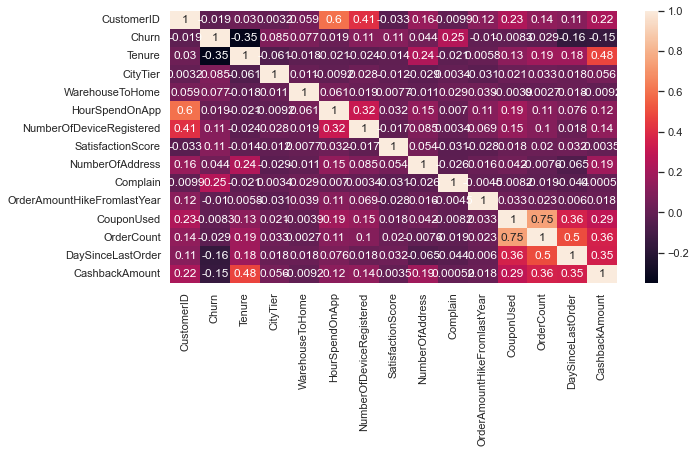

In [14]:
sns.heatmap(df.corr(), annot = True)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WarehouseToHome', ylabel='count'>

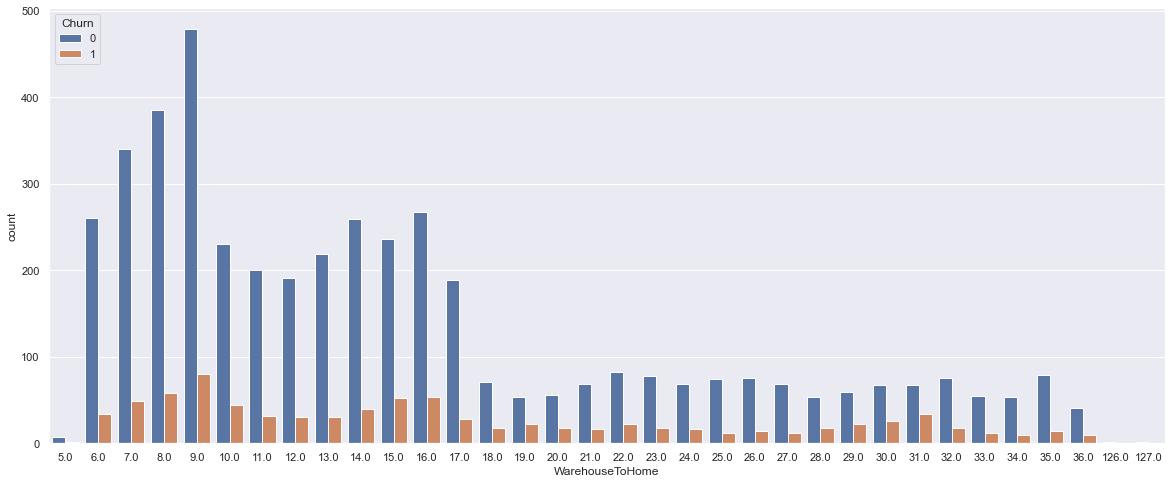

In [15]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot('WarehouseToHome',data = df, hue = 'Churn')

#### More than 70% of the deliveries are made at a distance of less than equals to 18kms  between warehouse and homes.

&nbsp;

In [16]:
df[df['WarehouseToHome']>18.0].shape

(1492, 20)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='count'>

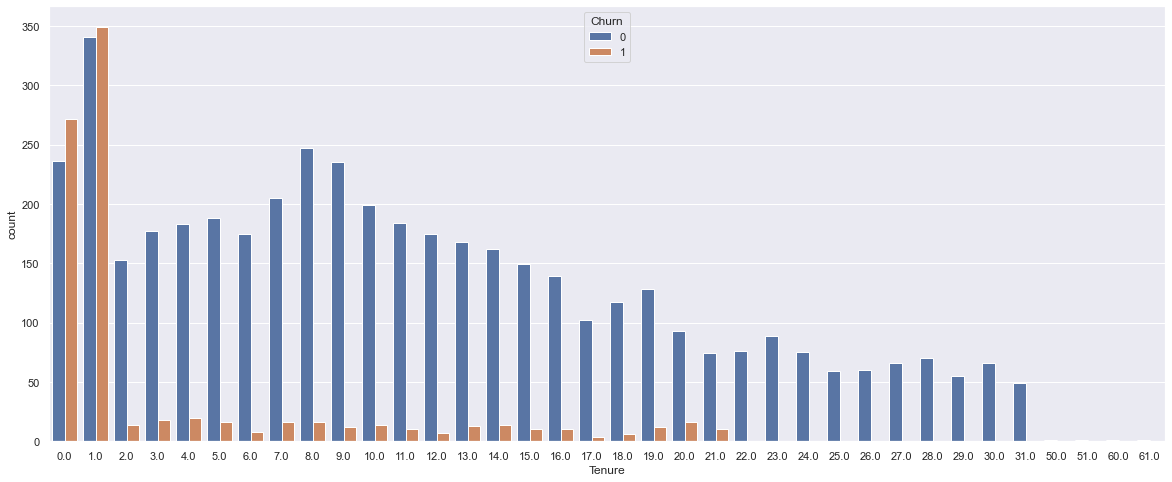

In [17]:
sns.countplot('Tenure', hue = 'Churn',data=df)

#### It shows that newbies are churning the most.so company should focus more on new customers for atleat 2 month because they churn within 2 months as compared to old ones.
#### old customers whose tenure are more than 21 months are not churning that shows their loyalty.
#### new customers are more as compared to old ones i.e loyal ones.



&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

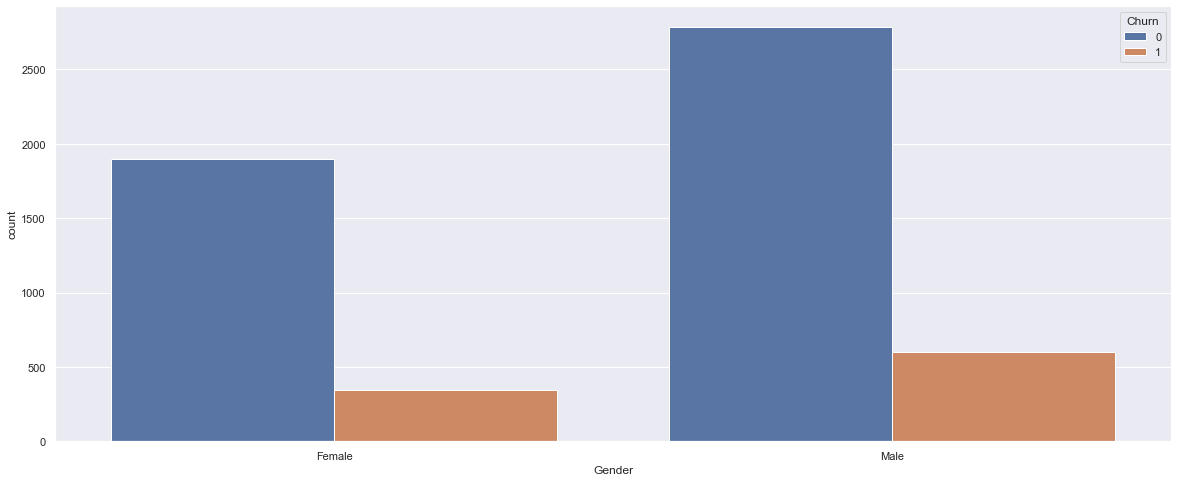

In [18]:
sns.countplot('Gender', hue = 'Churn',data=df)

In [19]:
df.groupby(['Gender','Churn']).size()

Gender  Churn
Female  0        1898
        1         348
Male    0        2784
        1         600
dtype: int64

#### 15.5 % women churn
#### 17.7% male churn

&nbsp;

In [20]:
ab = df.groupby('CityTier').size().reset_index().rename(columns={0:'Count'})
ab

,CityTier,Count
0,1,3666
1,2,242
2,3,1722


In [21]:
ab['Percent'] = (ab['Count']/ab['Count'].sum())*100

In [22]:
ab

,CityTier,Count,Percent
0,1,3666,65.115453
1,2,242,4.298401
2,3,1722,30.586146


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='count'>

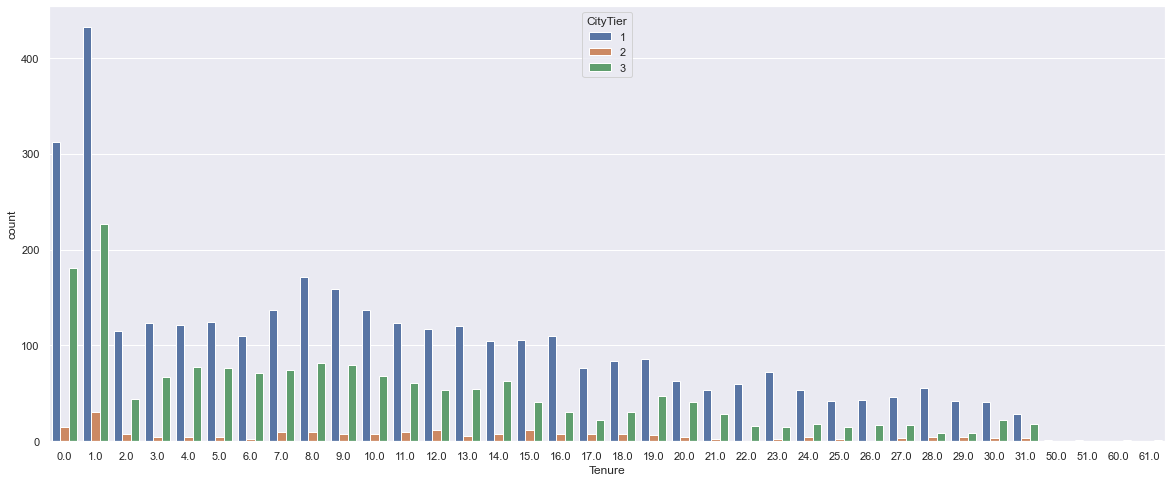

In [23]:
sns.countplot('Tenure', hue = 'CityTier', data = df)

&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OrderCount', ylabel='count'>

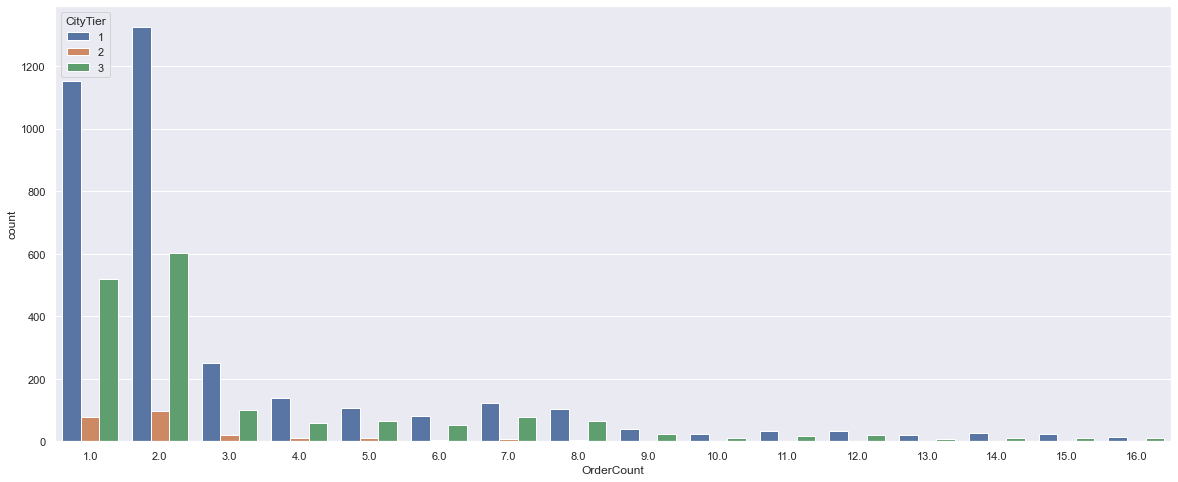

In [24]:
sns.countplot('OrderCount', hue = 'CityTier', data = df)

#### Most of the Traffic on the website is from Tier 1 cities followed by Tier 3 and Tier 2(very less)

&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CityTier', ylabel='count'>

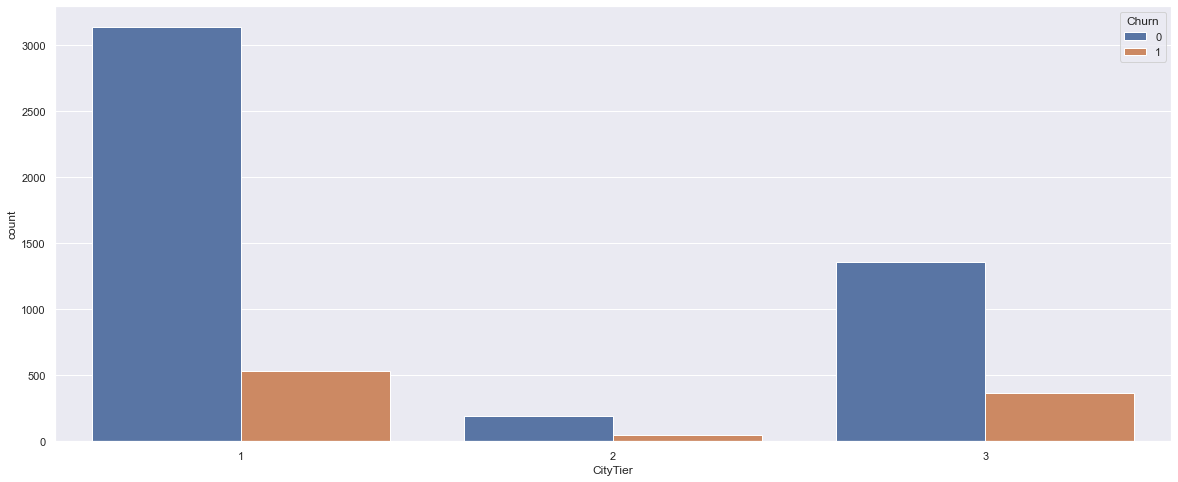

In [25]:
sns.countplot('CityTier', hue = 'Churn', data = df)

In [26]:
df.groupby(['CityTier','Churn']).size().reset_index()

,CityTier,Churn,0
0,1,0,3134
1,1,1,532
2,2,0,194
3,2,1,48
4,3,0,1354
5,3,1,368


#### Churn rate on the basis of City Tier
- __Tier 1 - 15%__
- __Tier 2 - 19%__
- __Tier 3 - 21%__



&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SatisfactionScore', ylabel='count'>

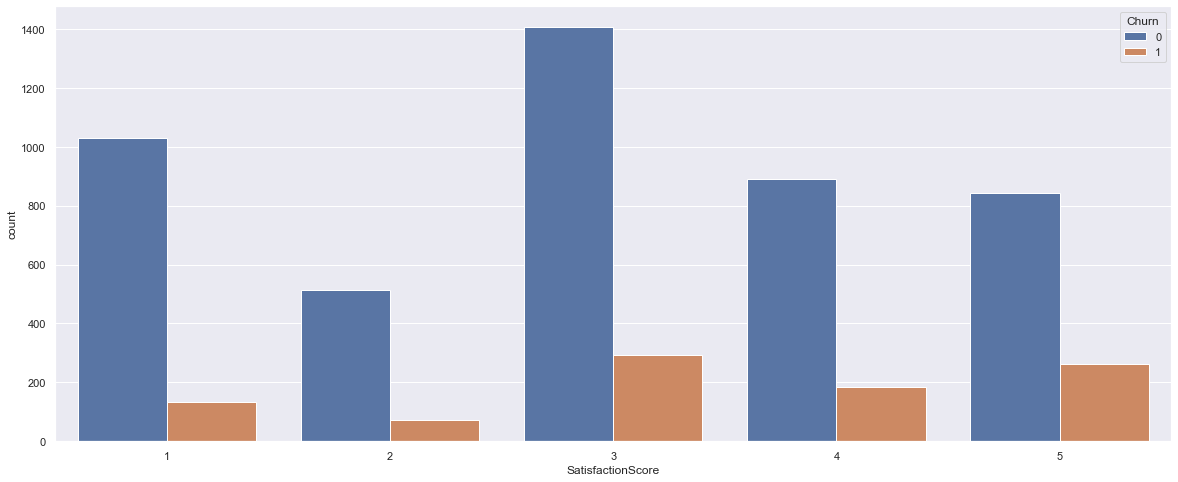

In [27]:
sns.countplot('SatisfactionScore', hue = 'Churn', data = df)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='count'>

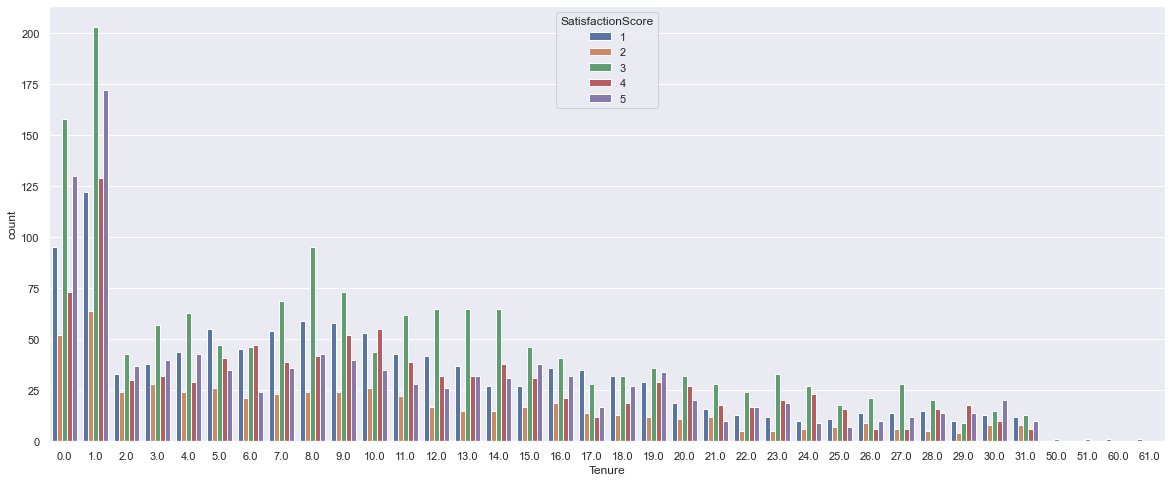

In [28]:
sns.countplot('Tenure', hue = 'SatisfactionScore', data = df)

In [29]:
df1 = df[(df.SatisfactionScore>=3) & (df.Tenure <= 1.0)]

In [30]:
df1.groupby(['SatisfactionScore','Churn']).size()

SatisfactionScore  Churn
3                  0        171
                   1        190
4                  0         95
                   1        107
5                  0        116
                   1        186
dtype: int64

#### df1 are the df of new cutomers i.e (0,1 months) who are satisfied.

&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SatisfactionScore', ylabel='count'>

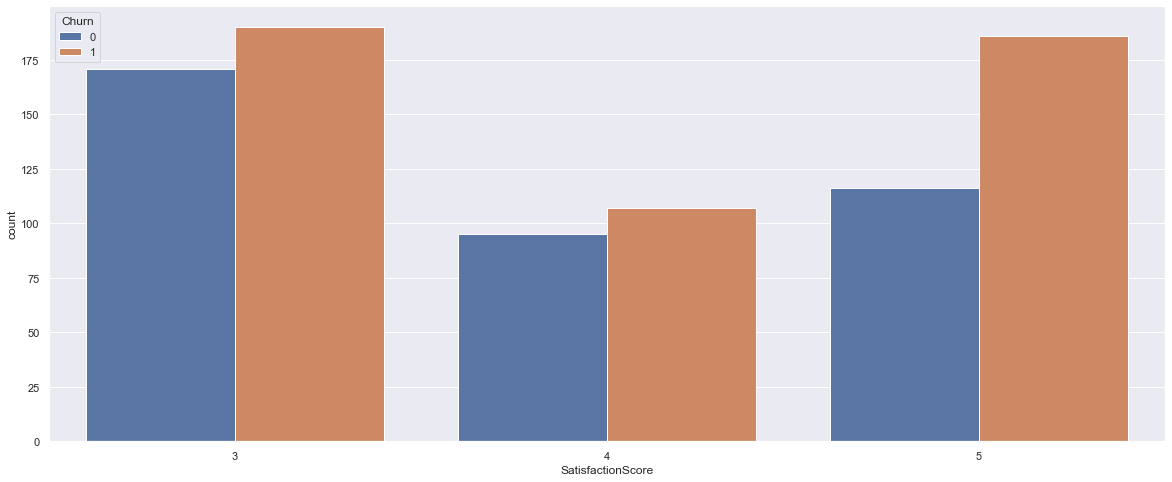

In [31]:
sns.countplot('SatisfactionScore', hue = 'Churn', data = df1)

 ####  There are 1198 new customers out of which 865 are the satistfied customers.i.e  72% new cusotmers are satisfied   (df1)
 ####  483 people out of 865 churn i.e 55% 

- Might be the incentive due to which the people were connected with the website discontinued.

#### df2 - new customers

In [32]:
df2 = df[df['Tenure']<= 1.0]

In [33]:
df2.shape

(1198, 20)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

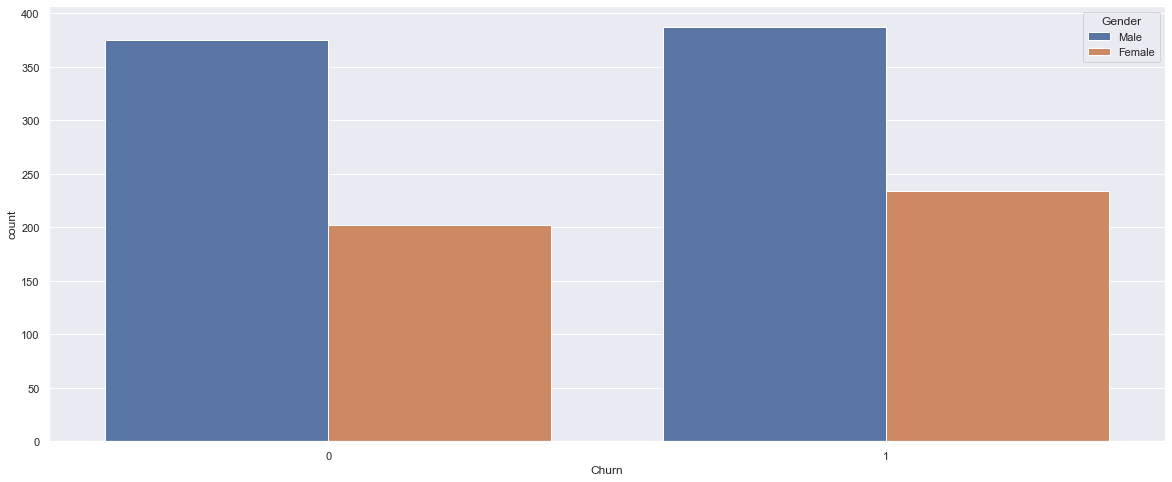

In [34]:
sns.countplot('Churn',hue = 'Gender',data = df2)

In [35]:
df2.groupby(['Churn','Gender']).size()

Churn  Gender
0      Female    202
       Male      375
1      Female    234
       Male      387
dtype: int64

#### Among the new customers(Tenure <=1) the churn rate is as follows (df2)
- Female 54% 
- Male 51%

&nbsp;

#### Single people

In [36]:
df3 = df[df['MaritalStatus']== 'Single']

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

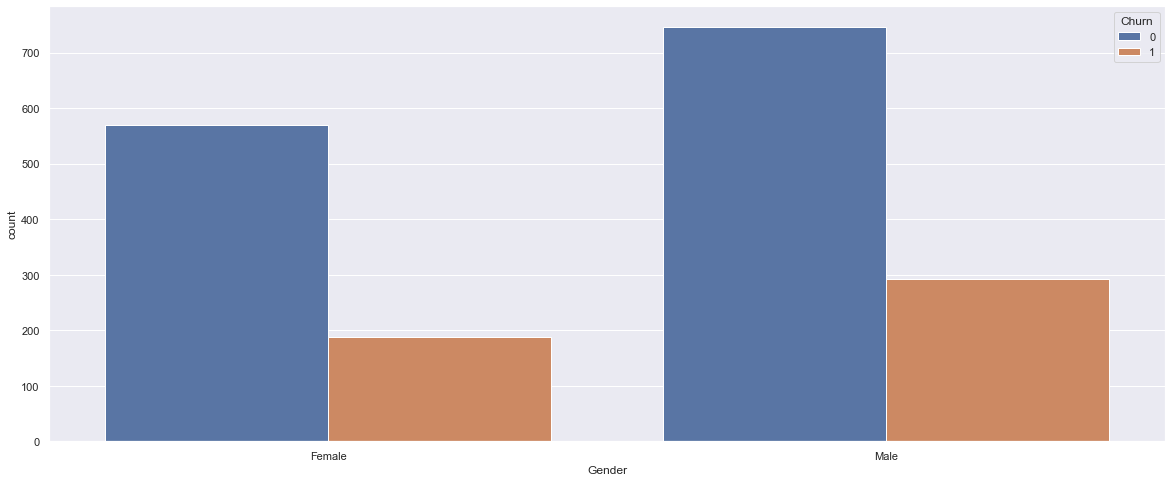

In [37]:
sns.countplot('Gender', hue = 'Churn',data= df3)

In [38]:
df3.groupby(['Gender','Churn']).size()

Gender  Churn
Female  0        570
        1        188
Male    0        746
        1        292
dtype: int64

#### Among the Unmarried Customers the churn rate is as follows(df3)
- Female 25%
- Male 28%
- 27% Unmarried customers Churn

&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

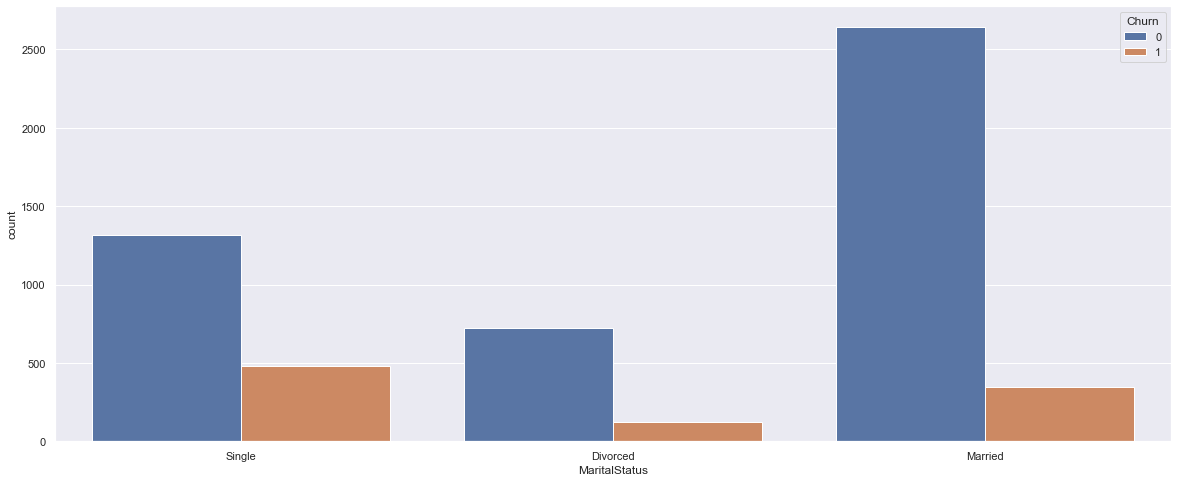

In [39]:
sns.countplot('MaritalStatus', hue = 'Churn', data = df)

In [40]:
df.groupby(['MaritalStatus','Churn']).size()

MaritalStatus  Churn
Divorced       0         724
               1         124
Married        0        2642
               1         344
Single         0        1316
               1         480
dtype: int64

#### Churn rate among the categories according to the marital Status are ( df)
- Divorced - 15%
- Married - 12%
- Single - 27%

&nbsp;

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Complain', ylabel='count'>

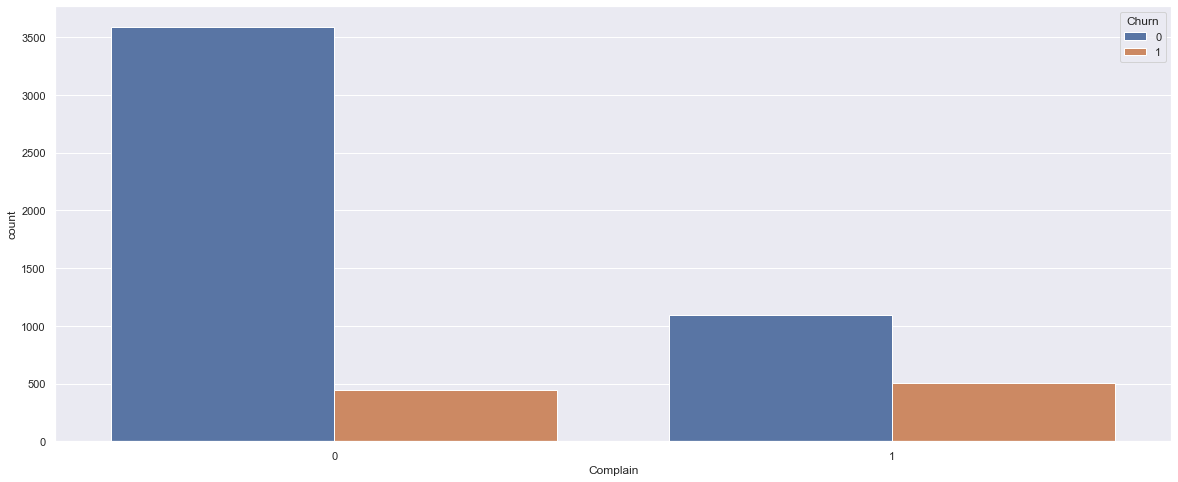

In [41]:
sns.countplot('Complain', hue = 'Churn', data = df)

&nbsp;

In [42]:
df.groupby(['Gender','PreferedOrderCat','MaritalStatus']).size()

Gender  PreferedOrderCat    MaritalStatus
Female  Fashion             Divorced          66
                            Married          188
                            Single           100
        Grocery             Divorced          40
                            Married          104
                            Single            54
        Laptop & Accessory  Divorced         132
                            Married          442
                            Single           270
        Mobile Phone        Divorced          94
                            Married          354
                            Single           316
        Others              Divorced          16
                            Married           52
                            Single            18
Male    Fashion             Divorced          60
                            Married          278
                            Single           134
        Grocery             Divorced          42
                           

- #### Men order more fashion product than women.
    - Married men are more in numbers followed by single.
    - average hours spend on app for male and female are almost same.<br> It may happen that men's id is used by their wives.


- more no of device registered in male id than female.

&nbsp;

### Outliers Detection and Treatment 

In [43]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


&nbsp;

In [44]:
columns = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

In [45]:
def outliers(df,feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    
    Lower_bound = Q1-1.5*IQR
    Upper_bound = Q3+1.5*IQR
    
    outl_index = df.index[(df[feature]<Lower_bound) | (df[feature]>Upper_bound)]
    return outl_index
    

In [46]:
index_mul_colmn = []
for i in columns:
    index_mul_colmn.extend(outliers(df,i))
    

In [47]:
Sorted_lst = sorted(set(index_mul_colmn))

In [102]:
len(Sorted_lst)

1582

&nbsp;

#### Throuh Inter Quantile range , there are 1582 rows in which outliers are present.
- it is not worth to drop outliers as size of data is already small.
- Replacing value more than upper bound and less than lower bound with median as median is less sensitive to outliers.

In [49]:
def imputing_nan_to_outliers(df,feature):
    for col in feature:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
    
        IQR = Q3 - Q1
    
        Lower_bound = Q1-1.5*IQR
        Upper_bound = Q3+1.5*IQR
    
        df[col] = np.where((df[col]<Lower_bound) | (df[col]>Upper_bound),df[col].median(),df[col])

In [50]:
imputing_nan_to_outliers(df,columns)

In [51]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.155237,1.654707,15.598067,2.932093,3.756661,3.066785,4.201599,0.284902,15.640261,1.168776,2.022152,4.377607,167.236330
std,1625.385339,0.374240,8.466211,0.915389,8.259223,0.716935,0.771520,1.380194,2.546850,0.451408,3.585530,0.803389,1.121577,3.351426,33.948422
min,50001.000000,0.000000,0.000000,1.000000,5.000000,1.000000,2.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,81.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.882500
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,2.000000,7.000000,182.437500
max,55630.000000,1.000000,31.000000,3.000000,36.000000,4.000000,5.000000,5.000000,11.000000,1.000000,25.000000,3.000000,6.000000,14.000000,272.320000


&nbsp;

## Skewess Detection and Treatment

In [53]:
df.skew(axis =0)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_5116/2290083512.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis =0)


CustomerID                     0.000000
Churn                          1.772843
Tenure                         0.654261
CityTier                       0.735326
WarehouseToHome                0.900089
HourSpendOnApp                -0.005353
NumberOfDeviceRegistered      -0.193046
SatisfactionScore             -0.142626
NumberOfAddress                0.962504
Complain                       0.953347
OrderAmountHikeFromlastYear    0.762844
CouponUsed                     0.390392
OrderCount                     1.776636
DaySinceLastOrder              0.669204
CashbackAmount                 0.990677
dtype: float64

#### Skewness
- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
- If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed

&nbsp;

In [54]:
Skew_col = ['Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear','OrderCount','DaySinceLastOrder','CashbackAmount']

In [55]:
for col in Skew_col: 
    print("Skewness of {} column is {}".format(col,df[col].skew()))
#     sns.distplot(df[col])
#     plt.show()
    

Skewness of Tenure column is 0.6542611324794475
Skewness of WarehouseToHome column is 0.9000886362206922
Skewness of NumberOfAddress column is 0.9625040130875783
Skewness of OrderAmountHikeFromlastYear column is 0.7628440510245647
Skewness of OrderCount column is 1.7766358409097207
Skewness of DaySinceLastOrder column is 0.6692041897399055
Skewness of CashbackAmount column is 0.9906768905637121


&nbsp;

In [56]:
for i in Skew_col:
    df[i] = np.log(df[i]+1)
    print("Skewness of {} column  is {}".format(i,df[i].skew()))
#     sns.distplot(df[i])
#     plt.show()

Skewness of Tenure column  is -0.5925022059672272
Skewness of WarehouseToHome column  is 0.26460308985208963
Skewness of NumberOfAddress column  is 0.2195465629668732
Skewness of OrderAmountHikeFromlastYear column  is 0.4507356059445017
Skewness of OrderCount column  is 0.8178592407580255
Skewness of DaySinceLastOrder column  is -0.4379529524856174
Skewness of CashbackAmount column  is 0.5127105801514045


- Log tranformation works better than Square root transformation.

&nbsp;

# Treating null values using Knn imputer

In [57]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,1.609438,Mobile Phone,3,1.945910,Debit Card,Female,3.0,3.0,Laptop & Accessory,2,Single,2.302585,1,2.484907,1.0,0.693147,1.791759,5.080969
1,50002,1,NaN,Mobile Phone,1,2.197225,UPI,Male,3.0,4.0,Mobile Phone,3,Single,2.079442,1,2.772589,0.0,0.693147,0.000000,4.803201
2,50003,1,NaN,Mobile Phone,1,3.433987,Debit Card,Male,2.0,4.0,Mobile Phone,3,Single,1.945910,1,2.708050,0.0,0.693147,1.386294,4.798102
3,50004,1,0.000000,Mobile Phone,3,2.772589,Debit Card,Male,2.0,4.0,Laptop & Accessory,5,Single,2.197225,0,3.178054,0.0,0.693147,1.386294,4.905793
4,50005,1,0.000000,Mobile Phone,1,2.564949,Credit Card,Male,NaN,3.0,Mobile Phone,5,Single,1.386294,0,2.484907,1.0,0.693147,1.386294,4.872139


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   float64
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [59]:
df = pd.get_dummies(df, drop_first = True)

In [60]:
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,1.609438,3,1.945910,3.0,3.0,2,2.302585,1,2.484907,1.0,0.693147,1.791759,5.080969,1,0,1,0,0,0,0,1,0,0,0,1
1,50002,1,NaN,1,2.197225,3.0,4.0,3,2.079442,1,2.772589,0.0,0.693147,0.000000,4.803201,1,0,0,0,1,1,0,0,1,0,0,1
2,50003,1,NaN,1,3.433987,2.0,4.0,3,1.945910,1,2.708050,0.0,0.693147,1.386294,4.798102,1,0,1,0,0,1,0,0,1,0,0,1
3,50004,1,0.000000,3,2.772589,2.0,4.0,5,2.197225,0,3.178054,0.0,0.693147,1.386294,4.905793,1,0,1,0,0,1,0,1,0,0,0,1
4,50005,1,0.000000,1,2.564949,NaN,3.0,5,1.386294,0,2.484907,1.0,0.693147,1.386294,4.872139,1,1,0,0,0,1,0,0,1,0,0,1


In [61]:
Y_dependent = df['Churn']

In [62]:
X_independent = df.drop(['Churn','CustomerID'],axis =1)

In [63]:
Y_dependent.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

&nbsp;

__Train test split__

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X_independent, Y_dependent, test_size=0.25, random_state=101)

&nbsp;

__Scaling independent features__

In [66]:
scale = StandardScaler()

In [67]:
scaled_xtrain = scale.fit_transform(x_train)

In [68]:
scaled_xtest = scale.transform(x_test)

&nbsp;


In [69]:
from sklearn.impute import KNNImputer

In [70]:
imputer = KNNImputer(n_neighbors=5)

&nbsp;

In [71]:
f_scaled_xtrain = imputer.fit_transform(scaled_xtrain)

In [72]:
f_scaled_xtest = imputer.transform(scaled_xtest)

__For Cross-Validation, whole dataset will be provided to model so applying  knn imputer on whole dataset after scaling__

In [73]:
scale1 = StandardScaler()

In [74]:
scaled_x = scale1.fit_transform(X_independent)

In [75]:
imputer1 = KNNImputer(n_neighbors = 5)

In [76]:
cv_total_x = imputer1.fit_transform(scaled_x)

&nbsp;

### Logistic Regression

__According to our problem statement, our main focus was to correctly predict customers who are going to churn.__
- so acc to problem statement, we have to focus on to reduce false negative, so we will focus on __recall__ rather <br> than accuracy of our model.

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logst = LogisticRegression()

In [83]:
logst.fit(f_scaled_xtrain,y_train)

LogisticRegression()

In [84]:
y_predicted = logst.predict(f_scaled_xtest)

&nbsp;

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

[[1138   40]
 [  89  141]]


<AxesSubplot:>

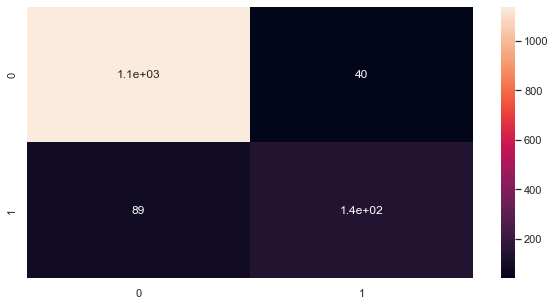

In [88]:
sns.set(rc={'figure.figsize':(10,5)})
print(confusion_matrix(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted), annot = True)

In [89]:
accuracy = accuracy_score(y_test,y_predicted)

In [90]:
accuracy

0.9083806818181818

- accuracy on test data = 90.85%
- accuracy on train data = 89.78%

In [110]:
print(classification_report(y_test,y_predicted, target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.93      0.97      0.95      1178
       churn       0.78      0.61      0.69       230

    accuracy                           0.91      1408
   macro avg       0.85      0.79      0.82      1408
weighted avg       0.90      0.91      0.90      1408



&nbsp;

__Size of train and tests data__

In [91]:
pd.DataFrame(y_train).value_counts()

Churn
0        3504
1         718
dtype: int64

In [109]:
pd.DataFrame(y_test).value_counts()

Churn
0        1178
1         230
dtype: int64

&nbsp;

### Performing smote on the imbalnced dataset
- we should not use imbalanced dataset for training because it may happen that model get baised toward majority class.

__83% are 0 and 17% are 1__
- Since dataset are small, so we can balanced this dataset by oversampling minority class i.e creating synthetic data , it works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
sm =SMOTE(random_state =42)

In [94]:
bal_x_train,bal_y_train =sm.fit_resample(f_scaled_xtrain,y_train)

In [95]:
pd.DataFrame(bal_y_train).value_counts()

Churn
0        3504
1        3504
dtype: int64

- __After performing smote, now the classes are in equall proportion__

&nbsp;

In [96]:
sm_logistic = LogisticRegression()

In [97]:
sm_logistic.fit(bal_x_train,bal_y_train)

LogisticRegression()

In [98]:
y_pre = sm_logistic.predict(f_scaled_xtest)

&nbsp;

[[991 187]
 [ 33 197]]


<AxesSubplot:>

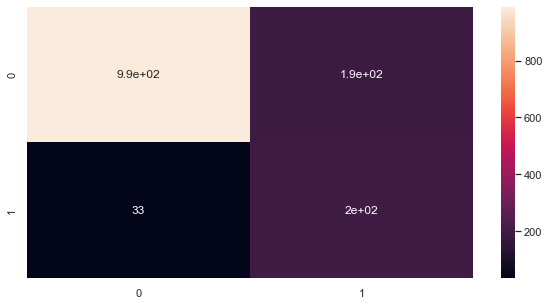

In [100]:
sns.set(rc={'figure.figsize':(10,5)})
print(confusion_matrix(y_test,y_pre))
sns.heatmap(confusion_matrix(y_test,y_pre), annot = True)

In [99]:
accuracy_score(y_test,y_pre)

0.84375

model accuracy on train data = 83.20%
model accuracy on test data = 84.37%

In [101]:
print(classification_report(y_test,y_pre, target_names=['not churn','churn']))

              precision    recall  f1-score   support

   not churn       0.97      0.84      0.90      1178
       churn       0.51      0.86      0.64       230

    accuracy                           0.84      1408
   macro avg       0.74      0.85      0.77      1408
weighted avg       0.89      0.84      0.86      1408

